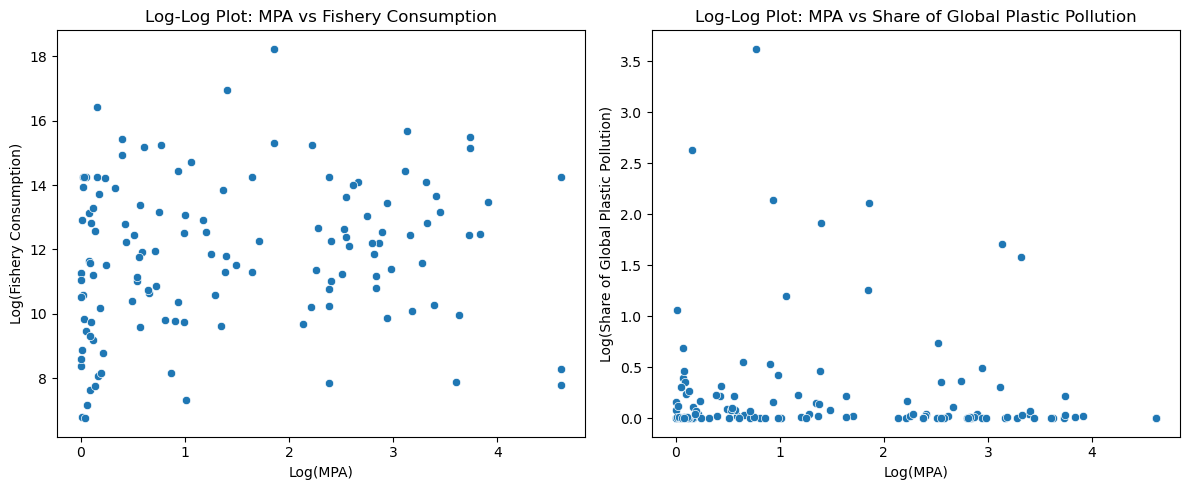

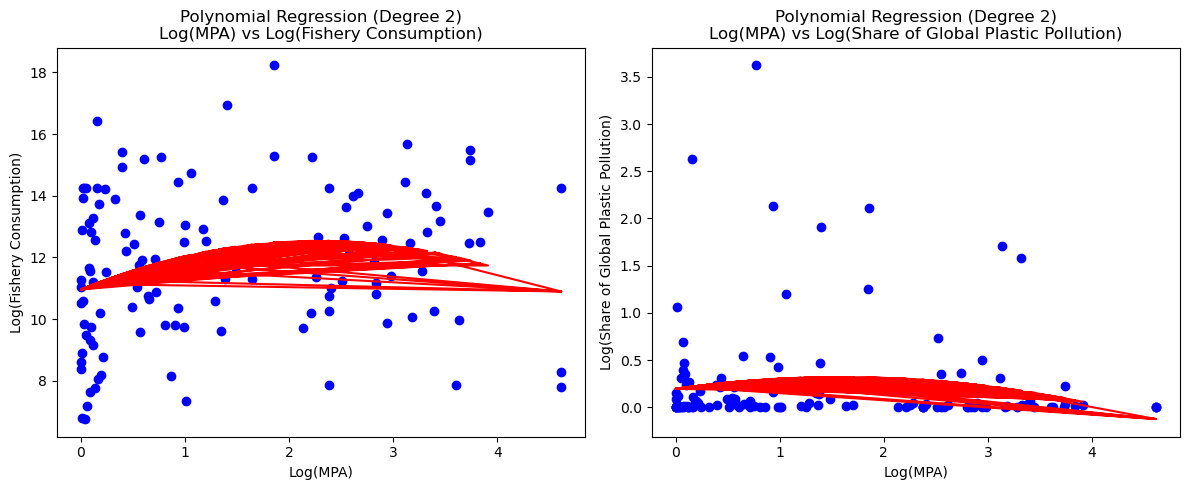

R-squared for Log(MPA) and Log(Fishery Consumption): 0.06316911667623071
R-squared for Log(MPA) and Log(Share of Global Plastic Pollution): 0.020724609356082002
                            OLS Regression Results                            
Dep. Variable:     FisheryConsumption   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.315
Date:                Tue, 30 Jul 2024   Prob (F-statistic):             0.0154
Time:                        16:08:40   Log-Likelihood:                -290.96
No. Observations:                 131   AIC:                             587.9
Df Residuals:                     128   BIC:                             596.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('input.csv')

# Extract relevant columns
mpa = data['MPA']
fishery_consumption = data['FisheryConsumption']
plastic_pollution = data['Share of global plastics emitted to ocean']

# Log transformation
log_mpa = np.log1p(mpa)
log_fishery_consumption = np.log1p(fishery_consumption)
log_plastic_pollution = np.log1p(plastic_pollution)

# Create scatter plots with log-transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=log_mpa, y=log_fishery_consumption)
plt.title('Log-Log Plot: MPA vs Fishery Consumption')
plt.xlabel('Log(MPA)')
plt.ylabel('Log(Fishery Consumption)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=log_mpa, y=log_plastic_pollution)
plt.title('Log-Log Plot: MPA vs Share of Global Plastic Pollution')
plt.xlabel('Log(MPA)')
plt.ylabel('Log(Share of Global Plastic Pollution)')

plt.tight_layout()
plt.show()

# Polynomial regression function for log-transformed data
def polynomial_regression_log(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    return y_poly_pred, model, polynomial_features

# Fit polynomial regression for log(MPA) and log(Fishery Consumption)
degree = 2  # You can try higher degrees as well
y_poly_pred_fishery_log, model_fishery_log, poly_features_fishery_log = polynomial_regression_log(log_mpa.values, log_fishery_consumption.values, degree)

# Fit polynomial regression for log(MPA) and log(Share of Global Plastic Pollution)
y_poly_pred_plastic_log, model_plastic_log, poly_features_plastic_log = polynomial_regression_log(log_mpa.values, log_plastic_pollution.values, degree)

# Plot results for log-transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(log_mpa, log_fishery_consumption, color='blue')
plt.plot(log_mpa, y_poly_pred_fishery_log, color='red')
plt.title('Polynomial Regression (Degree {})\nLog(MPA) vs Log(Fishery Consumption)'.format(degree))
plt.xlabel('Log(MPA)')
plt.ylabel('Log(Fishery Consumption)')

plt.subplot(1, 2, 2)
plt.scatter(log_mpa, log_plastic_pollution, color='blue')
plt.plot(log_mpa, y_poly_pred_plastic_log, color='red')
plt.title('Polynomial Regression (Degree {})\nLog(MPA) vs Log(Share of Global Plastic Pollution)'.format(degree))
plt.xlabel('Log(MPA)')
plt.ylabel('Log(Share of Global Plastic Pollution)')

plt.tight_layout()
plt.show()

# Evaluate models using R-squared
r2_fishery_log = r2_score(log_fishery_consumption, y_poly_pred_fishery_log)
r2_plastic_log = r2_score(log_plastic_pollution, y_poly_pred_plastic_log)

print(f"R-squared for Log(MPA) and Log(Fishery Consumption): {r2_fishery_log}")
print(f"R-squared for Log(MPA) and Log(Share of Global Plastic Pollution): {r2_plastic_log}")

# Fit polynomial regression for log-transformed data using statsmodels
X_poly_fishery_log = sm.add_constant(poly_features_fishery_log.fit_transform(log_mpa.values.reshape(-1, 1)))
model_fishery_stats_log = sm.OLS(log_fishery_consumption, X_poly_fishery_log).fit()

X_poly_plastic_log = sm.add_constant(poly_features_plastic_log.fit_transform(log_mpa.values.reshape(-1, 1)))
model_plastic_stats_log = sm.OLS(log_plastic_pollution, X_poly_plastic_log).fit()

# Print model summaries for log-transformed data
print(model_fishery_stats_log.summary())
print(model_plastic_stats_log.summary())
